In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
'10,000'
''

In [11]:
import pandas as pd
import numpy as np
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t', encoding = 'latin1')

df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,"15,000","12,167",1 month,26k,12k,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1.0M,"5,598",3 months,12k,5.7k,Thomas Stoy needs your help today! Olivia Stoy...,41.527272,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,"250,000",841,2 months,1.8k,836,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,"225,000","4,708",1 month,9.7k,4.7k,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,"225,000","8,393",2 months,6.4k,8.9k,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1237,https://www.gofundme.com/help-send-michelle-to...,Wishes,22,Help Send Michelle to Israel!,"DELL RAPIDS, SD",10370.0,"8,000",103,5 months,398,106,Michelle Serlet needs your help today! Help Se...,43.826084,-96.706161
1238,1238,https://www.gofundme.com/support-alvins-family,Wishes,22,Support AlvinÃ¢ÂÂs Family,"MONROE, GA",10349.0,"15,000",185,1 month,977,194,Kalvin Ahmed needs your help today! Support Al...,33.794836,-83.713229
1239,1239,https://www.gofundme.com/nuclear-medicine-tech...,Wishes,23,College & Medical expenses,"DALLAS, TX",10330.0,"50,000",9,27 days,66,11,Anjelica Vossler needs your help today! Colleg...,32.776664,-96.796988
1240,1240,https://www.gofundme.com/girls-junior-national...,Wishes,23,Rhonda's Wish,"San Antonio TX 78218, US",10265.0,"15,000",109,3 months,476,114,Anesi Maverick Tuufuli needs your help today! ...,29.489578,-98.385532


In [46]:
df['Goal'].value_counts()

10,000     113
100,000     88
50,000      86
15,000      73
25,000      70
          ... 
390,000      1
9,610        1
29,000       1
108,000      1
6,800        1
Name: Goal, Length: 154, dtype: int64

In [49]:
df['Length_of_Fundraising'].value_counts()

5 months    224
2 months    222
1 month     215
4 months    203
3 months    196
6 months     65
22 days       8
23 days       8
16 days       6
29 days       6
12 days       6
27 days       6
15 days       5
18 days       5
13 days       5
8 days        5
9 days        5
26 days       5
14 days       4
28 days       4
25 days       4
17 days       4
21 days       4
10 days       4
24 days       4
20 days       2
11 days       2
7 days        2
19 days       2
Name: Length_of_Fundraising, dtype: int64

In [ ]:
import plotly.express as px 
import numpy 
  
# Random Data 
random_x = [100, 2000, 550] 
names = df['Goal'].values.tolist()
  
fig = px.pie(values=random_x, names=names) 
fig.show()

In [37]:
df['Url']

0       https://www.gofundme.com/3ctqm-medical-bills-f...
1       https://www.gofundme.com/olivia-stoy-bone-marr...
2       https://www.gofundme.com/autologous-Tcell-Tran...
3            https://www.gofundme.com/a-chance-of-rebirth
4                     https://www.gofundme.com/teamclaire
                              ...                        
1237    https://www.gofundme.com/help-send-michelle-to...
1238       https://www.gofundme.com/support-alvins-family
1239    https://www.gofundme.com/nuclear-medicine-tech...
1240    https://www.gofundme.com/girls-junior-national...
1241    https://www.gofundme.com/home-for-mom-with-dis...
Name: Url, Length: 1242, dtype: object

In [15]:
df['Text']

0       Rodolfo Rodriguez needs your help today! 92 Yr...
1       Thomas Stoy needs your help today! Olivia Stoy...
2       Philip Defonte needs your help today! AUTOLOGO...
3       Sriram Kanniah needs your help today! A chance...
4       Melissa Yeager needs your help today! Claire W...
                              ...                        
1237    Michelle Serlet needs your help today! Help Se...
1238    Kalvin Ahmed needs your help today! Support Al...
1239    Anjelica Vossler needs your help today! Colleg...
1240    Anesi Maverick Tuufuli needs your help today! ...
1241    Liseth Valencia needs your help today! Home fo...
Name: Text, Length: 1242, dtype: object

In [16]:
import spacy
from spacy.tokenizer import Tokenizer

class HandleTokens(object):
    """
    Created these functions as modules, some important methods used to finish assignment 1.
    """
    @staticmethod
    def tokenize(df_in):
        """
        Tokenize by inputting a dataframe. Outputs a tokenized list.
        :param df_in:
        :return:
        """
        nlp = spacy.load("en_core_web_lg")

        # Tokenizer
        tokenizer = Tokenizer(nlp.vocab)
        tokens = []
        for doc in tokenizer.pipe(df_in, batch_size=500):
            doc_tokens = [token.text for token in doc]
            tokens.append(doc_tokens)
        return tokens

    @staticmethod
    def count(docs):
        """
        Count words in inputted dataframe, and sorts them by rank.
        :param docs:
        :return:
        """
        word_counts = Counter()
        appears_in = Counter()

        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())

        wc = pd.DataFrame(temp, columns=['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)

        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

        return wc.sort_values(by='rank')

    @staticmethod
    def stopwords(list_in):
        """
        Stopwords are to be removed from our tokenized list, please initiate this function first
        before inputted into the combine_stopwords() function. Or use this function as a functor.
        :param list_in:
        :return:
        """
        nlp = spacy.load("en_core_web_lg")

        # Tokenizer
        tokenizer = Tokenizer(nlp.vocab)
        return nlp.Defaults.stop_words.union(list_in)

    @staticmethod
    def combine_stopwords(dataframe_in, stopword_dict):
        """
        Please use the stopwords() function and input that into the stopword_dict parameter.
        returns filtered tokens.
        :param dataframe_in:
        :param stopword_dict:
        :return:
        """
        nlp = spacy.load("en_core_web_lg")

        # Tokenizer
        tokenizer = Tokenizer(nlp.vocab)

        tokens = []

        for doc in tokenizer.pipe(dataframe_in, batch_size=500):

            doc_tokens = []

            for token in doc:
                if token.text.lower() not in stopword_dict:
                    doc_tokens.append(token.text.lower())

            tokens.append(doc_tokens)

        return tokens

    @staticmethod
    def lemma_attributes(doc):
        """
        Input doc to print lemma attributes
        :param doc:
        :return:
        """
        for token in doc:
            print(token.text, "  ", token.lemma_)


    @staticmethod
    def get_lemmas(text):
        """
        Lemmatization, The goal is to transform a word into its base form called a lemma.
        Plural nouns with funky spellings get transformed to singular tense.
        Verbs are all transformed to the transitive.
        Nice tidy data for a visualization

        :param text:
        :return:
        """
        nlp = spacy.load("en_core_web_lg")

        lemmas = []

        doc = nlp(text)

        # Something goes here :P
        for token in doc:
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_)

        return lemmas
    
    @staticmethod
    def df2lemma(df_in):
        """
        Lemmatization, The goal is to transform a word into its base form called a lemma.
        Plural nouns with funky spellings get transformed to singular tense.
        Verbs are all transformed to the transitive.
        Nice tidy data for a visualization

        :param text:
        :return:
        """
        def get_lemmas(text):
            nlp = spacy.load("en_core_web_lg")

            lemmas = []

            doc = nlp(text)

            # Something goes here :P
            for token in doc:
                if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
                    lemmas.append(token.lemma_)

            return lemmas
    
        lem_state = []

        for i,x in enumerate((df_in)):
            print(f"{i}:{len(df_in)}", end='\r')
            lemmas = HT.get_lemmas(x)
            lem_state.append(lemmas)

        return lem_state
        
    
    
    
    

In [17]:
#save lem state
class LemState(object):
    def __init__(self):
        self._lem = "state"
        
    @property
    def lem(self):
        return self._lem
    
    @lem.setter
    def lem(self, value):
        self._lem = value

In [24]:
df['Text'].dropna()

0       Rodolfo Rodriguez needs your help today! 92 Yr...
1       Thomas Stoy needs your help today! Olivia Stoy...
2       Philip Defonte needs your help today! AUTOLOGO...
3       Sriram Kanniah needs your help today! A chance...
4       Melissa Yeager needs your help today! Claire W...
                              ...                        
1237    Michelle Serlet needs your help today! Help Se...
1238    Kalvin Ahmed needs your help today! Support Al...
1239    Anjelica Vossler needs your help today! Colleg...
1240    Anesi Maverick Tuufuli needs your help today! ...
1241    Liseth Valencia needs your help today! Home fo...
Name: Text, Length: 1237, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
data = df['Text'].dropna()
vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

C:\Users\corte\anaconda3\envs\002-natlang\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


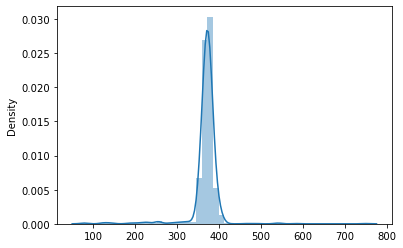

In [26]:
doc_len = [len(doc) for doc in data]
import seaborn as sns

sns.distplot(doc_len);

In [27]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
nlp = spacy.load("en_core_web_lg")
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,,1,100,15,2018,3,8/8/18,able,amazing,...,¦,©,®,ãâ,ãâ,ã¢ââ,ã¢ââthe,ã¢ââ,ã¯â¿â¼,ã¯â¿â¼
0,0.105164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.098262,0.098262,0.0,0.0,0.0,0.0,0.0
1,0.048140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.042338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.103473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.neighbors import NearestNeighbors
# Knn state to save model and reduce computation time
class KnnState(object):
    def __init__(self):
        self._nn = "state"
        
    @property
    def test(self):
        return self._nn
    
    @test.setter
    def test(self, value):
        self._nn = value
        

In [30]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

KNN = KnnState()
KNN.nn = nn.fit(dtm)
KNN.nn

NearestNeighbors(algorithm='kd_tree')

In [65]:
review = ["""This is a campaign to help Paulina Besabe and her family with medical, travel and funereal expenses as the result of Paulina's stage 4 cancer diagnosis."""]

In [66]:
new = tfidf.transform(review)

In [67]:
neighbors = KNN.nn.kneighbors(new.todense())
neighbors

(array([[1.24423547, 1.25217449, 1.26141951, 1.28215962, 1.28780103]]),
 array([[ 65, 125,  60, 736, 912]], dtype=int64))

In [68]:
neighbors[1][0].tolist()
for i, x in enumerate(neighbors[1][0].tolist()):
    print(data[x])
    print(df['Amount_Raised'][x])

Kevin McKeon needs your help today! Cole's Fight Against Neuroblastoma - Our friends, Stephanie and Kevin McKeon recently had their world turned upside down with news that their sweet little boy, Cole, has Stage 4 Neuroblastoma. Please read a post from Kevin below: 'Our happy and seemingly healthy son Cole was just diagnosed with Stage 4 Neuroblastoma. It is a fast mo...
94720.0
Emilie Matthias needs your help today! Garrett Matthias/Matthias Family - My heart is breaking today for a very sweet 5 year old named Garrett and his family (his mom Emilie, who is my cousin, her husband Ryan and his 6 year old big sister).ÃÂ  Garrett has been fighting a rare form of cancer since September (stage 4 Alveolar Fusion Negative Rhabdomyosarcoma).ÃÂ  ARMS is a...
71339.0
Selman Altun needs your help today! Selman's Liver& Kidney Transplant - This Go Fund Me Campaign is for me, Selman Altun.ÃÂ This fund raising effort is to help offset the medical bills, lifelong medications, travel expenses and l

In [60]:
data[x]

'Mary Ann Worrell-Grasso needs your help today! Helping an old friend - Sometimes we all need a little help along the way in this journey we call Ã¢Â\x80Â\x9clifeÃ¢Â\x80Â\x9d. For those who knew and remember Fr Eldridge Evans, he has come to a place where he needs a bit of help. His home needs some repairs and maintenance and he just doesnÃ¢Â\x80Â\x99t have the funds available. Ã\x82Â\xa0Please help as best...'

In [62]:
df[]

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1.0M,"5,598",3 months,12k,5.7k,Thomas Stoy needs your help today! Olivia Stoy...,41.527272,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,"250,000",841,2 months,1.8k,836,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
